In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
sb.set()


In [3]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
x = df[['age','sex']]
y = df['chol']

In [5]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
reg.coef_   # X value

array([  1.11909504, -19.86509981])

In [7]:
reg.intercept_  # Y value

198.9941356404578

In [11]:
r = reg.score(x, y) # R square value
r

0.07724967195232191

### Formula for Adjuster R^2
$R^2_{adj.} = 1 - (1 - r^2)*\frac{n-1}{n-p-1}$

In [9]:
x.shape    # n = 303 p = 2

(303, 2)

In [12]:
n = x.shape[0]
p = x.shape[1]
adjusted_r = 1 - (1 - r)*(n - 1)/(n - p - 1)
adjusted_r

0.07109800309867065

In [21]:
pvalue = f_regression(x,y)[1]  # p value
pvalue

array([0.00017863, 0.00052997])

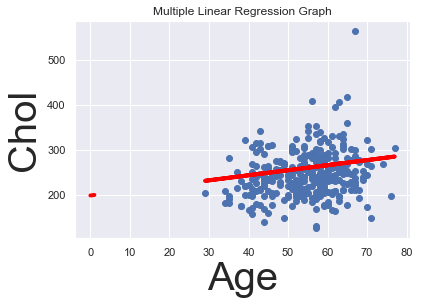

In [25]:
# plotting age vs chol
plt.scatter(df['age'], df['chol'])
yhat = reg.coef_[0] * x + reg.intercept_
fig = plt.plot(x, yhat, lw=4, color='red', label='regression line')
plt.title('Multiple Linear Regression Graph')
plt.xlabel('Age', fontsize=40)
plt.ylabel('Chol', fontsize=40)
plt.show()


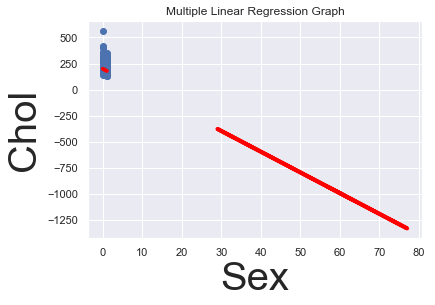

In [29]:
# plot sex vs chol
plt.scatter(df['sex'], df['chol'])
yhat = reg.coef_[1] * x + reg.intercept_
fig = plt.plot(x, yhat, lw=4, color='red', label='regression line')
plt.title('Multiple Linear Regression Graph')
plt.xlabel('Sex', fontsize=40)
plt.ylabel('Chol', fontsize=40)
plt.show()
